In [49]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [121]:
resultados=[]

# Carregar dados

In [22]:
df = pd.read_csv("..//dados/NeoMort_MA.csv")
df.head().T

,0,1,2,3,4
Unnamed: 0,1.0,2.0,3.0,4.0,5.0
CODMUNNASC,210005.0,210005.0,210005.0,210005.0,210005.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,19.0,25.0,18.0,23.0,24.0
ESTCIVMAE,2.0,2.0,1.0,2.0,1.0
ESCMAE,4.0,4.0,4.0,4.0,4.0
QTDFILVIVO,0.0,0.0,0.0,1.0,1.0
QTDFILMORT,0.0,0.0,0.0,0.0,0.0
GESTACAO,5.0,5.0,5.0,5.0,5.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [23]:
df_ns = pd.read_csv("..//dados/NeoMort_MA_nSMOTE.csv")
df_ns.head().T

,0,1,2,3,4
Unnamed: 0,1100.0,1147.0,1231.0,1305.0,1561.0
CODMUNNASC,210043.0,210043.0,210043.0,210043.0,210043.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,18.0,14.0,27.0,37.0,18.0
ESTCIVMAE,5.0,9.0,1.0,5.0,1.0
ESCMAE,3.0,3.0,4.0,4.0,3.0
QTDFILVIVO,0.0,0.0,4.0,4.0,0.0
QTDFILMORT,0.0,0.0,0.0,2.0,0.0
GESTACAO,4.0,4.0,5.0,5.0,2.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [24]:
df_s = pd.read_csv("..//dados/NeoMort_MA_SMOTE.csv")
df_s.head().T

,0,1,2,3,4
Unnamed: 0,1100,1147,1231,1305,1561
CODMUNNASC,210043,210043,210043,210043,210043
LOCNASC,1,1,1,1,1
IDADEMAE,18,14,27,37,18
ESTCIVMAE,5,9,1,5,1
ESCMAE,3,3,4,4,3
QTDFILVIVO,0,0,4,4,0
QTDFILMORT,0,0,0,2,0
GESTACAO,4,4,5,5,2
GRAVIDEZ,1,1,1,1,1


# Correlação de Pearson

VIVO          1.000000
APGAR5        0.136699
APGAR1        0.105716
GESTACAO      0.100503
PESO          0.091061
CONSULTAS     0.019883
KOTELCHUCK    0.008149
SEXO          0.007135
IDANOMAL      0.006081
QTDPARTCES    0.005422
PARTO         0.005076
QTDFILVIVO    0.003930
CODMUNNASC    0.001395
QTDGESTANT    0.001337
ESTCIVMAE     0.000957
LOCNASC       0.000736
QTDPARTNOR    0.000666
DTNASC       -0.000259
ESCMAE       -0.000583
IDADEMAE     -0.001654
GRAVIDEZ     -0.004388
QTDFILMORT   -0.006385
RACACOR      -0.010565
RACACORMAE   -0.010565
TPROBSON     -0.047214
Name: VIVO, dtype: float64


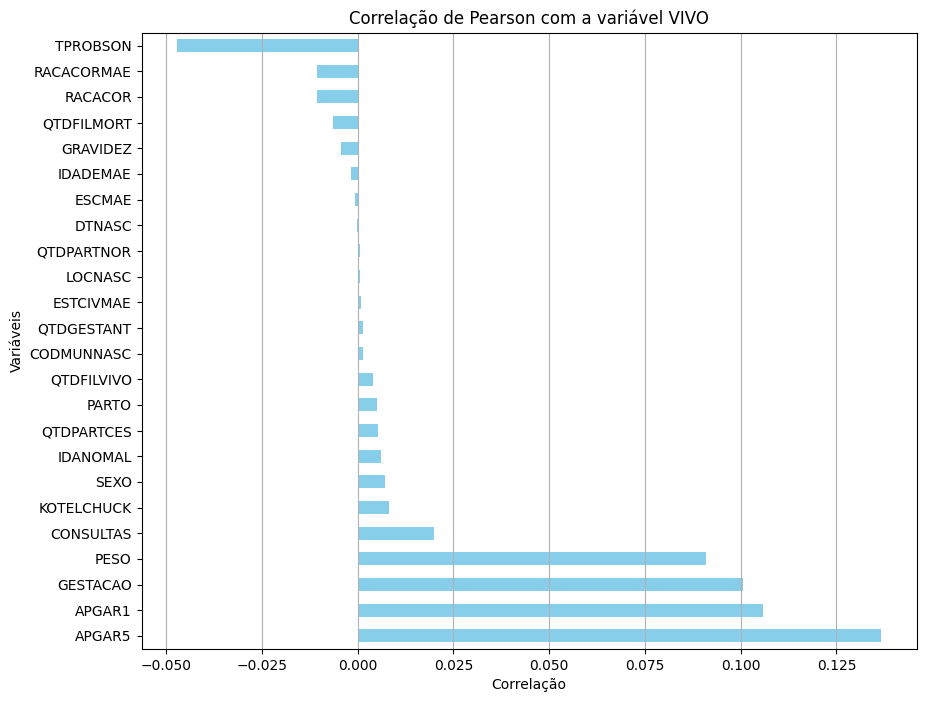

In [123]:
# Removendo a coluna 'Unnamed: 0' se existir
df = df.loc[:, df.columns != 'Unnamed: 0']

# Calculando a correlação de Pearson entre as variáveis independentes e a variável alvo
correlacao = df.corr(method='pearson')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo = correlacao['VIVO'].sort_values(ascending=False)

# Exibindo as correlações
print(correlacao_vivo)
resultados.append(correlacao_vivo)

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
correlacao_vivo.drop('VIVO').plot(kind='barh', color='skyblue')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Pearson com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

VIVO          1.000000
APGAR1        0.562397
APGAR5        0.539593
PESO          0.480093
GESTACAO      0.429865
CONSULTAS     0.171947
KOTELCHUCK    0.081229
SEXO          0.076137
QTDPARTCES    0.058919
PARTO         0.057838
QTDFILVIVO    0.028784
IDANOMAL      0.028069
ESCMAE        0.016812
LOCNASC       0.008813
QTDGESTANT    0.003238
QTDPARTNOR   -0.003630
ESTCIVMAE    -0.015550
DTNASC       -0.016708
CODMUNNASC   -0.016770
IDADEMAE     -0.038781
GRAVIDEZ     -0.048217
QTDFILMORT   -0.062899
RACACORMAE   -0.118656
RACACOR      -0.118656
TPROBSON     -0.376126
Name: VIVO, dtype: float64


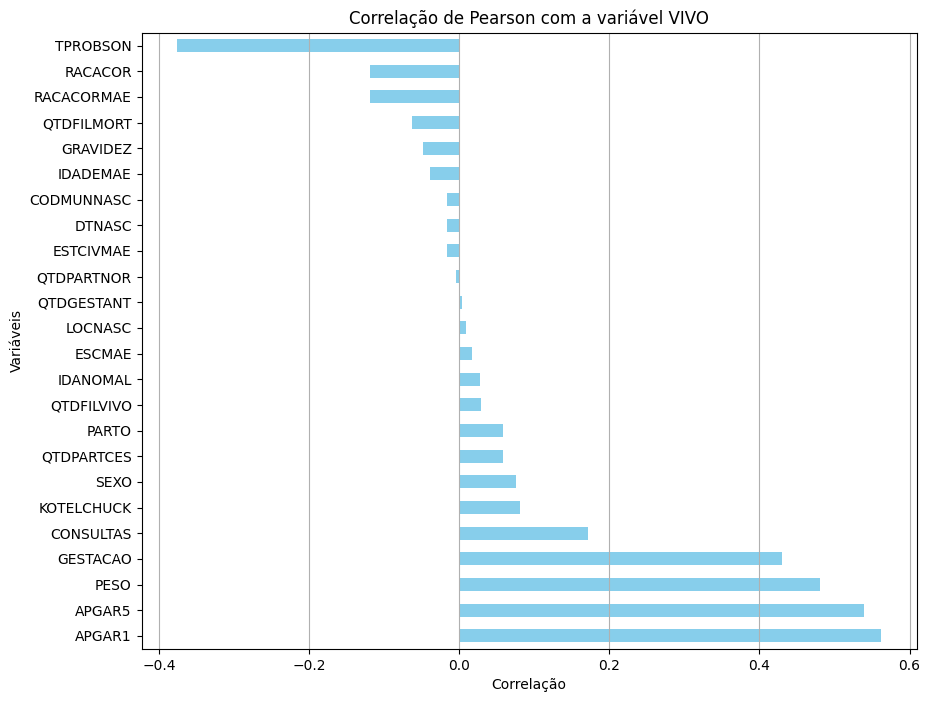

In [125]:
# Removendo a coluna 'Unnamed: 0' se existir
df_ns = df_ns.drop(columns=['Unnamed: 0'], errors='ignore')

# Calculando a correlação de Pearson entre as variáveis independentes e a variável alvo
correlacao = df_ns.corr(method='pearson')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo = correlacao['VIVO'].sort_values(ascending=False)

# Exibindo as correlações
print(correlacao_vivo)
resultados.append(correlacao_vivo)

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
correlacao_vivo.drop('VIVO').plot(kind='barh', color='skyblue')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Pearson com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

VIVO          1.000000
APGAR1        0.653347
APGAR5        0.643210
GESTACAO      0.582843
PESO          0.534866
CONSULTAS     0.347583
SEXO          0.326132
PARTO         0.290397
QTDPARTCES    0.216444
KOTELCHUCK    0.201160
ESCMAE        0.172503
QTDFILVIVO    0.168481
QTDGESTANT    0.135636
IDANOMAL      0.124164
QTDPARTNOR    0.120642
QTDFILMORT    0.111026
ESTCIVMAE     0.097902
GRAVIDEZ      0.068697
LOCNASC       0.050504
IDADEMAE      0.024644
CODMUNNASC    0.008809
DTNASC       -0.003836
RACACORMAE   -0.071535
RACACOR      -0.071535
TPROBSON     -0.336399
Name: VIVO, dtype: float64


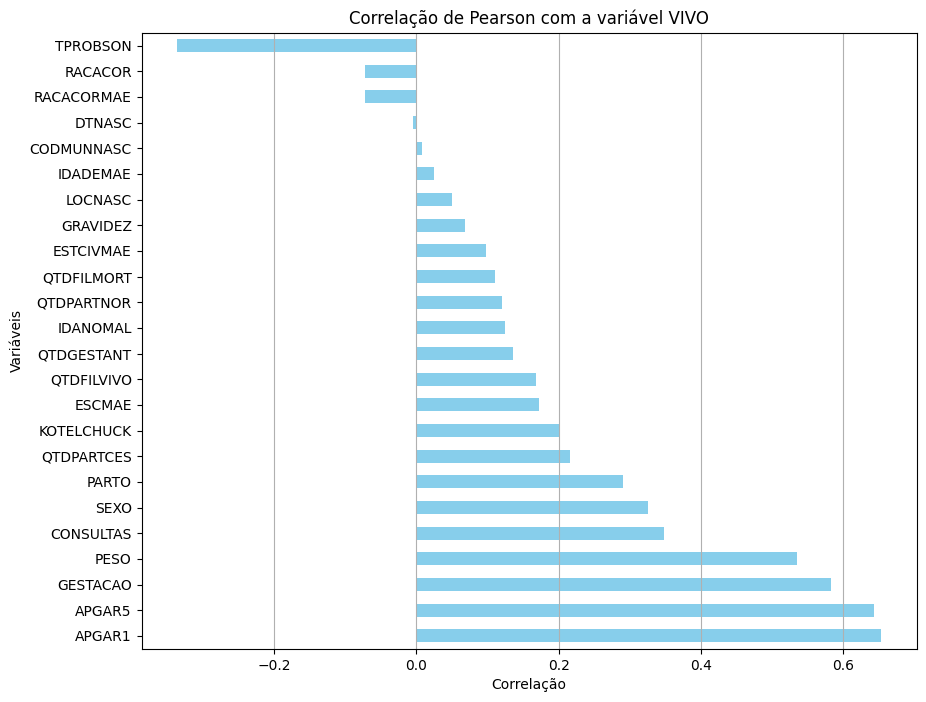

In [127]:
# Removendo a coluna 'Unnamed: 0' se existir
df_s = df_s.drop(columns=['Unnamed: 0'], errors='ignore')

# Calculando a correlação de Pearson entre as variáveis independentes e a variável alvo
correlacao = df_s.corr(method='pearson')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo = correlacao['VIVO'].sort_values(ascending=False)

# Exibindo as correlações
print(correlacao_vivo)
resultados.append(correlacao_vivo)

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
correlacao_vivo.drop('VIVO').plot(kind='barh', color='skyblue')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Pearson com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

# Correlação de Spearman

VIVO          1.000000
APGAR5        0.064434
APGAR1        0.061026
GESTACAO      0.057396
IDANOMAL      0.048786
PESO          0.045979
CONSULTAS     0.021261
KOTELCHUCK    0.011466
SEXO          0.006809
QTDFILVIVO    0.006095
QTDPARTCES    0.005957
PARTO         0.005074
QTDGESTANT    0.003313
LOCNASC       0.002387
ESTCIVMAE     0.001677
CODMUNNASC    0.001407
QTDPARTNOR    0.001290
IDADEMAE     -0.000150
DTNASC       -0.000223
ESCMAE       -0.001144
QTDFILMORT   -0.004409
GRAVIDEZ     -0.004607
RACACOR      -0.011494
RACACORMAE   -0.011494
TPROBSON     -0.033525
Name: VIVO, dtype: float64


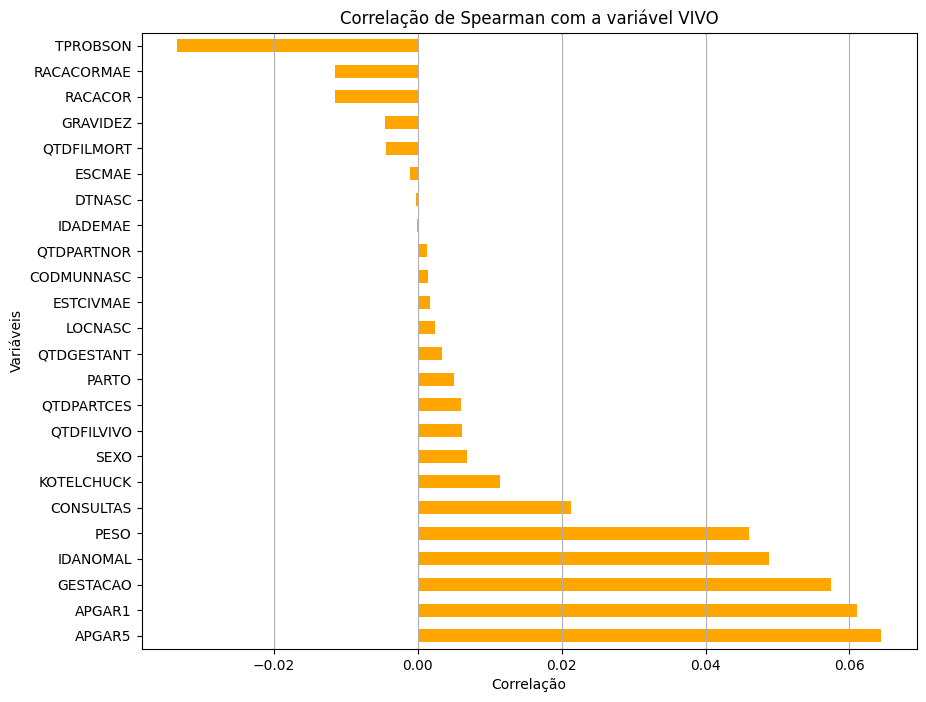

In [130]:
# Calculando a correlação de Spearman entre as variáveis independentes e a variável alvo
correlacao_spearman = df.corr(method='spearman')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo_spearman = correlacao_spearman['VIVO'].sort_values(ascending=False)

# Exibindo as correlações de Spearman
print(correlacao_vivo_spearman)
resultados.append(correlacao_vivo_spearman)

# Gerando o gráfico de barras horizontais - Spearman
plt.figure(figsize=(10, 8))
correlacao_vivo_spearman.drop('VIVO').plot(kind='barh', color='orange')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Spearman com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()


VIVO          1.000000
APGAR5        0.579745
APGAR1        0.553385
PESO          0.445311
GESTACAO      0.419177
CONSULTAS     0.218949
IDANOMAL      0.184227
KOTELCHUCK    0.119187
SEXO          0.073678
QTDPARTCES    0.063896
PARTO         0.057838
QTDFILVIVO    0.046941
LOCNASC       0.030349
QTDGESTANT    0.020690
ESCMAE        0.012143
ESTCIVMAE     0.000453
QTDPARTNOR   -0.005908
DTNASC       -0.016325
CODMUNNASC   -0.017354
IDADEMAE     -0.022160
QTDFILMORT   -0.047489
GRAVIDEZ     -0.048217
RACACOR      -0.131378
RACACORMAE   -0.131378
TPROBSON     -0.338407
Name: VIVO, dtype: float64


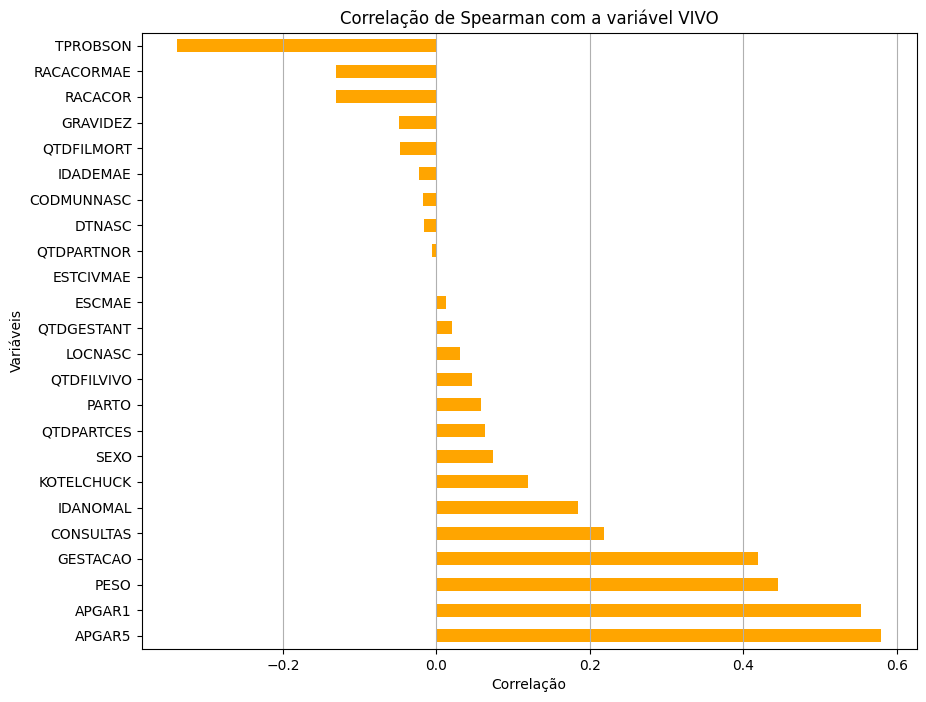

In [131]:
# Calculando a correlação de Spearman entre as variáveis independentes e a variável alvo
correlacao_spearman = df_ns.corr(method='spearman')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo_spearman = correlacao_spearman['VIVO'].sort_values(ascending=False)

# Exibindo as correlações de Spearman
print(correlacao_vivo_spearman)
resultados.append(correlacao_vivo_spearman)

# Gerando o gráfico de barras horizontais - Spearman
plt.figure(figsize=(10, 8))
correlacao_vivo_spearman.drop('VIVO').plot(kind='barh', color='orange')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Spearman com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

VIVO          1.000000
APGAR5        0.742029
APGAR1        0.715427
GESTACAO      0.626958
PESO          0.533962
CONSULTAS     0.407094
SEXO          0.325425
PARTO         0.290397
IDANOMAL      0.264159
QTDPARTCES    0.225809
KOTELCHUCK    0.225719
ESCMAE        0.191703
QTDFILVIVO    0.180977
QTDGESTANT    0.140170
QTDFILMORT    0.124999
QTDPARTNOR    0.115756
ESTCIVMAE     0.074850
LOCNASC       0.074439
GRAVIDEZ      0.068771
CODMUNNASC    0.027466
IDADEMAE      0.012723
DTNASC       -0.003452
RACACORMAE   -0.027431
RACACOR      -0.027431
TPROBSON     -0.331603
Name: VIVO, dtype: float64


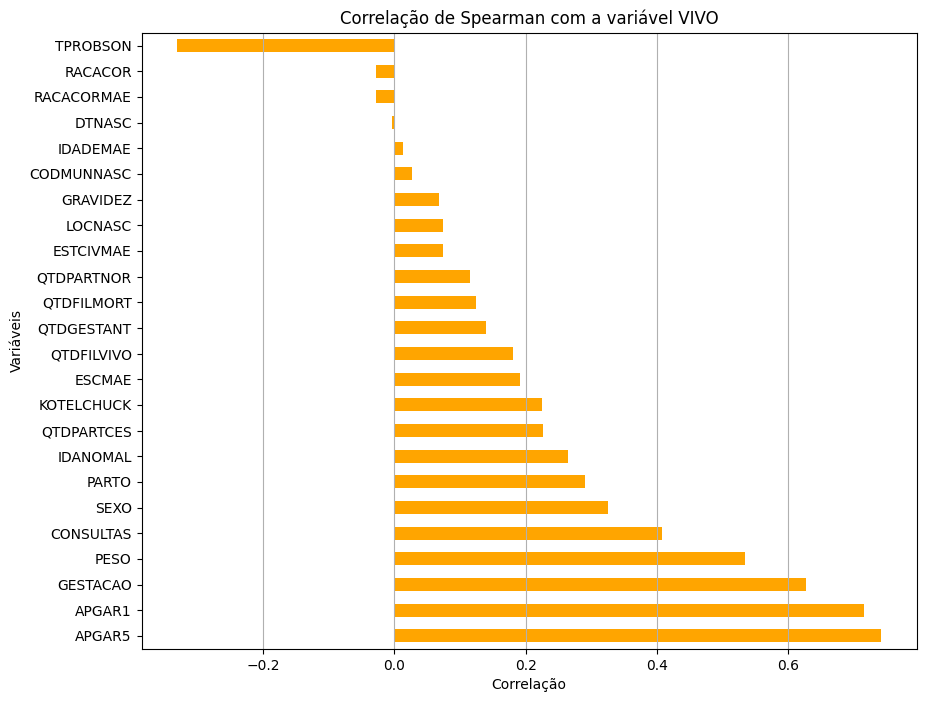

In [132]:
# Calculando a correlação de Spearman entre as variáveis independentes e a variável alvo
correlacao_spearman = df_s.corr(method='spearman')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo_spearman = correlacao_spearman['VIVO'].sort_values(ascending=False)

# Exibindo as correlações de Spearman
print(correlacao_vivo_spearman)
resultados.append(correlacao_vivo_spearman)

# Gerando o gráfico de barras horizontais - Spearman
plt.figure(figsize=(10, 8))
correlacao_vivo_spearman.drop('VIVO').plot(kind='barh', color='orange')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Spearman com a variável VIVO')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()


In [140]:
res_tab = pd.DataFrame({f'Correlacao_{i+1}': series for i, series in enumerate(resultados)})

In [142]:
res_tab

,Correlacao_1,Correlacao_2,Correlacao_3,Correlacao_4,Correlacao_5,Correlacao_6
APGAR1,0.105716,0.562397,0.653347,0.061026,0.553385,0.715427
APGAR5,0.136699,0.539593,0.643210,0.064434,0.579745,0.742029
CODMUNNASC,0.001395,-0.016770,0.008809,0.001407,-0.017354,0.027466
CONSULTAS,0.019883,0.171947,0.347583,0.021261,0.218949,0.407094
DTNASC,-0.000259,-0.016708,-0.003836,-0.000223,-0.016325,-0.003452
ESCMAE,-0.000583,0.016812,0.172503,-0.001144,0.012143,0.191703
ESTCIVMAE,0.000957,-0.015550,0.097902,0.001677,0.000453,0.074850
GESTACAO,0.100503,0.429865,0.582843,0.057396,0.419177,0.626958
GRAVIDEZ,-0.004388,-0.048217,0.068697,-0.004607,-0.048217,0.068771
IDADEMAE,-0.001654,-0.038781,0.024644,-0.000150,-0.022160,0.012723


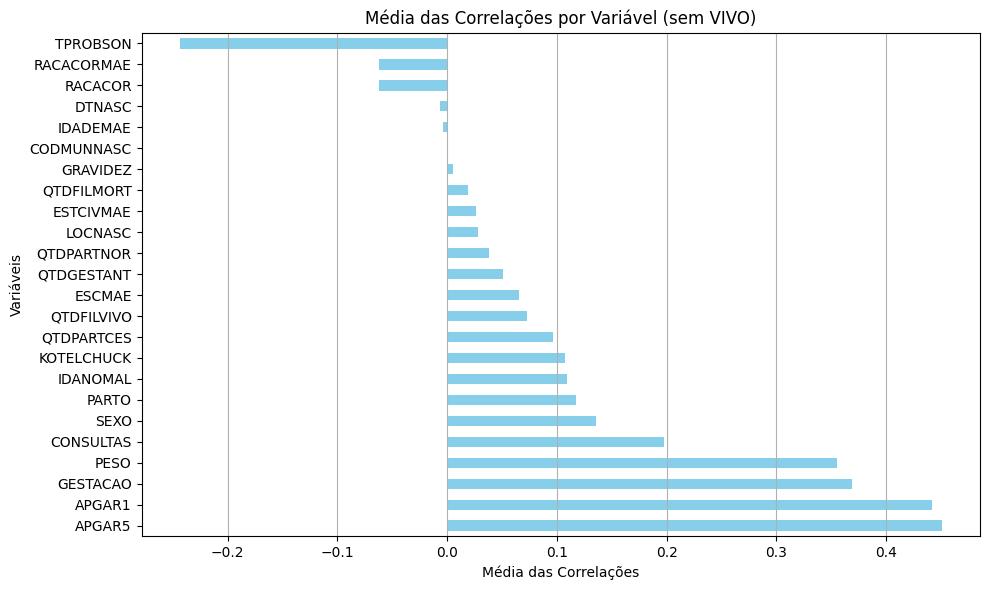

In [158]:
# Excluir a linha 'VIVO'
res_tab = res_tab.drop(index='VIVO', errors='ignore')

# Calcular a média das correlações e ordenar do maior para o menor
media_correlacoes = res_tab.mean(axis=1).sort_values(ascending=False)

# Criar o gráfico horizontal
plt.figure(figsize=(10, 6))
media_correlacoes.plot(kind='barh', color='skyblue')
plt.title('Média das Correlações por Variável (sem VIVO)')
plt.xlabel('Média das Correlações')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.tight_layout()
plt.show()

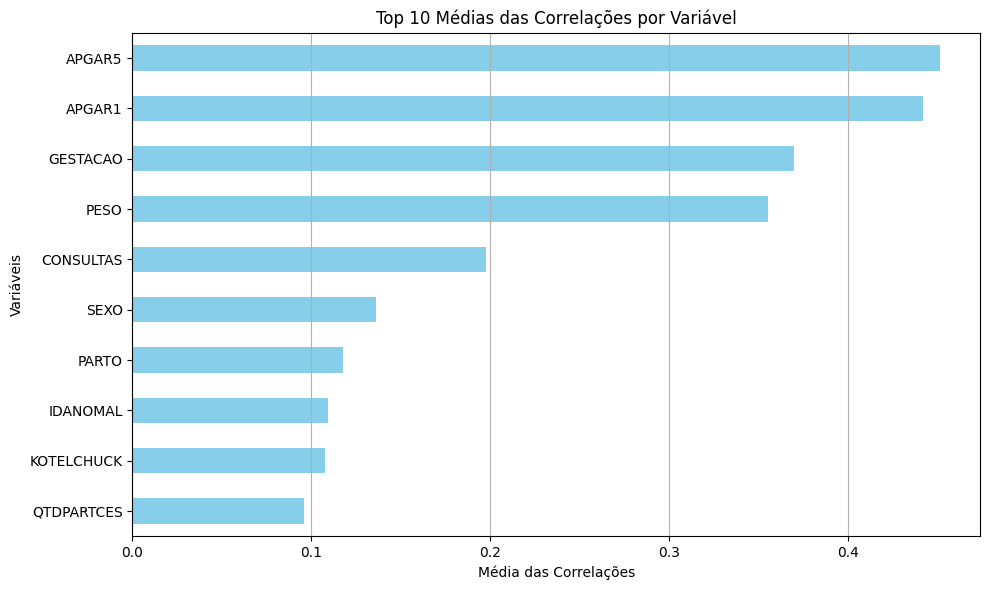

In [170]:
# Obter os 10 maiores valores da média das correlações
top_10_correlacoes = media_correlacoes.nlargest(10)

# Inverter a ordem para que o maior fique no topo
top_10_correlacoes = top_10_correlacoes.sort_values(ascending=True)

# Criar o gráfico horizontal
plt.figure(figsize=(10, 6))
top_10_correlacoes.plot(kind='barh', color='skyblue')
plt.title('Top 10 Médias das Correlações por Variável')
plt.xlabel('Média das Correlações')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.tight_layout()
plt.show()

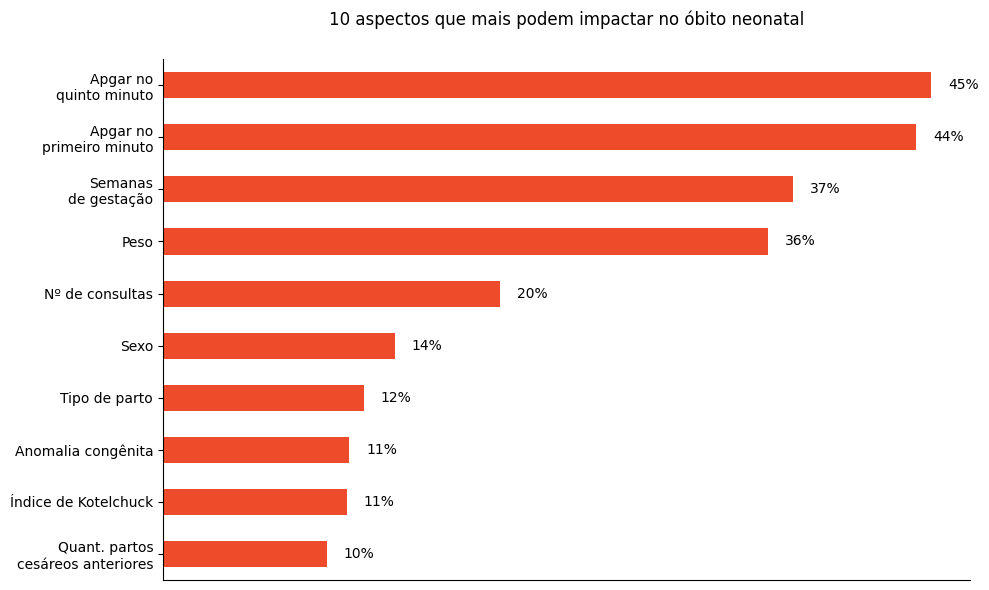

In [240]:
# Obter os 10 maiores valores da média das correlações
top_10_correlacoes = media_correlacoes.nlargest(10)

# Inverter a ordem para que o maior fique no topo
top_10_correlacoes = top_10_correlacoes.sort_values(ascending=True)

# Criar o gráfico horizontal
plt.figure(figsize=(10, 6))
ax = top_10_correlacoes.plot(kind='barh', color='#EE4B2B')

# Adicionar rótulos com porcentagens dentro das barras
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height()/2, 
            f'{i.get_width()*100:.0f}%', 
            va='center')

# Remover as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('10 aspectos que mais podem impactar no óbito neonatal', pad=25)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.grid(axis='x')

# Personalizar os nomes dos ticks y
personalizados = [
    'Quant. partos\ncesáreos anteriores', 
    'Índice de Kotelchuck', 
    'Anomalia congênita', 
    'Tipo de parto', 
    'Sexo', 
    'Nº de consultas', 
    'Peso', 
    'Semanas\nde gestação', 
    'Apgar no\nprimeiro minuto', 
    'Apgar no\nquinto minuto'
]

# Ajustar os ticks do eixo y com os nomes personalizados
plt.yticks(ticks=range(len(top_10_correlacoes)), labels=personalizados)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [242]:
media_correlacoes

APGAR5        0.450952
APGAR1        0.441883
GESTACAO      0.369457
PESO          0.355212
CONSULTAS     0.197786
SEXO          0.135886
PARTO         0.117770
IDANOMAL      0.109248
KOTELCHUCK    0.107818
QTDPARTCES    0.096075
QTDFILVIVO    0.072535
ESCMAE        0.065239
QTDGESTANT    0.050731
QTDPARTNOR    0.038136
LOCNASC       0.027871
ESTCIVMAE     0.026715
QTDFILMORT    0.019140
GRAVIDEZ      0.005340
CODMUNNASC    0.000825
IDADEMAE     -0.004230
DTNASC       -0.006801
RACACOR      -0.061843
RACACORMAE   -0.061843
TPROBSON     -0.243879
dtype: float64